### Darts Forecasting with National Grid DSO Data 2009-2024

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

#### Read in DataFrame and examine contents

In [89]:
df = pd.read_csv("historic_demand_2009_2024_noNaN.csv")

df.head()

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


### Check for duplicates

In [90]:
duplicates = df.duplicated()

print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
270107    False
270108    False
270109    False
270110    False
270111    False
Length: 270112, dtype: bool


### Observe nullable rows and datatypes. The 'settlement_date' is an object which will not work with time series forecasting and has to be converted to dateime

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270112 entries, 0 to 270111
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            270112 non-null  object
 1   settlement_period          270112 non-null  int64 
 2   period_hour                270112 non-null  object
 3   nd                         270112 non-null  int64 
 4   tsd                        270112 non-null  int64 
 5   england_wales_demand       270112 non-null  int64 
 6   embedded_wind_generation   270112 non-null  int64 
 7   embedded_wind_capacity     270112 non-null  int64 
 8   embedded_solar_generation  270112 non-null  int64 
 9   embedded_solar_capacity    270112 non-null  int64 
 10  non_bm_stor                270112 non-null  int64 
 11  pump_storage_pumping       270112 non-null  int64 
 12  ifa_flow                   270112 non-null  int64 
 13  ifa2_flow                  270112 non-null  

In [92]:
df['settlement_date'] = pd.to_datetime(df['settlement_date'])

In [93]:
df.set_index('settlement_date', inplace=True)

In [94]:
df.head()

,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
settlement_date,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


### Renaming the columns and confirming transformed datatype

In [95]:
df.rename(columns={'nd':'national_demand'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270112 entries, 2009-01-01 00:00:00 to 2024-06-13 23:30:00
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_period          270112 non-null  int64 
 1   period_hour                270112 non-null  object
 2   national_demand            270112 non-null  int64 
 3   tsd                        270112 non-null  int64 
 4   england_wales_demand       270112 non-null  int64 
 5   embedded_wind_generation   270112 non-null  int64 
 6   embedded_wind_capacity     270112 non-null  int64 
 7   embedded_solar_generation  270112 non-null  int64 
 8   embedded_solar_capacity    270112 non-null  int64 
 9   non_bm_stor                270112 non-null  int64 
 10  pump_storage_pumping       270112 non-null  int64 
 11  ifa_flow                   270112 non-null  int64 
 12  ifa2_flow                  270112 non-null  int64 
 13  britned_fl

### Creation of two datasets focusing on the 'national_demand' column and resetting the index

In [96]:
df = df['national_demand']

df_weekly = df.resample('W').sum() 
df_monthly = df.resample('M').sum()

df_weekly_df = df_weekly.reset_index()
df_monthly_df = df_monthly.reset_index()


/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_37191/1443155256.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


In [97]:
df_weekly.info()
df_monthly.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 807 entries, 2009-01-04 to 2024-06-16
Freq: W-SUN
Series name: national_demand
Non-Null Count  Dtype
--------------  -----
807 non-null    int64
dtypes: int64(1)
memory usage: 12.6 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 186 entries, 2009-01-31 to 2024-06-30
Freq: ME
Series name: national_demand
Non-Null Count  Dtype
--------------  -----
186 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


### Plotting both series 

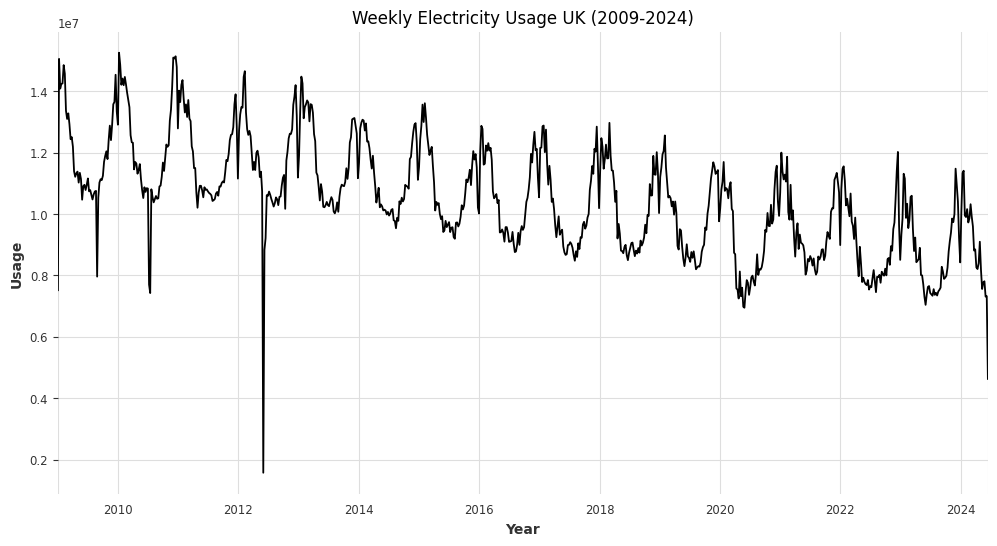

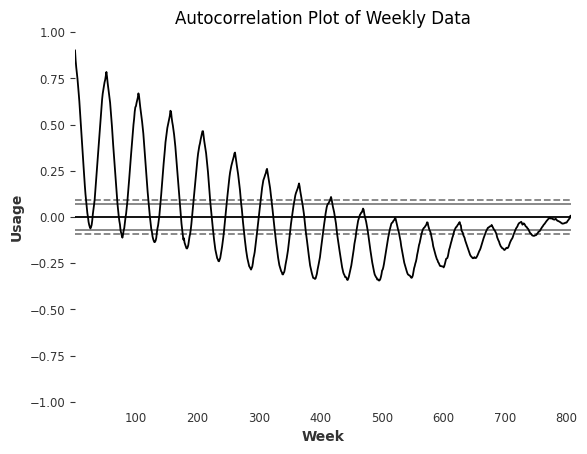

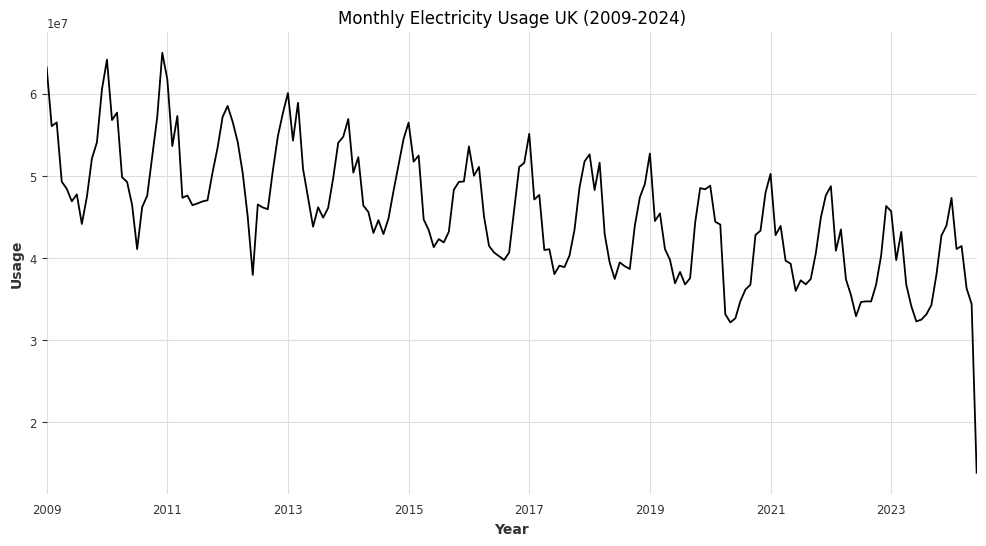

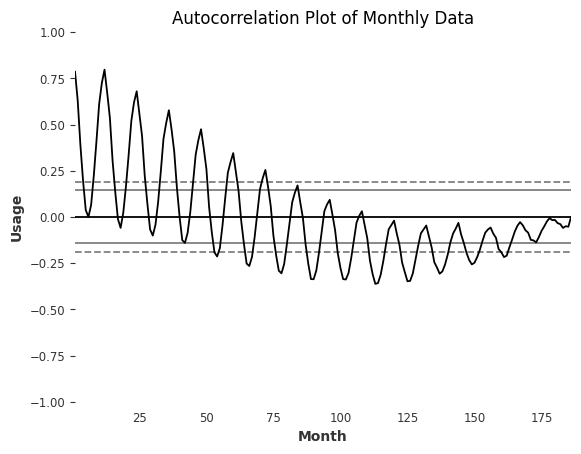

In [98]:
df_weekly.plot(title='Weekly Electricity Usage UK (2009-2024)', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Usage')
plt.show()

acf_weekly = pd.plotting.autocorrelation_plot(df_weekly)
plt.xlabel('Week')
plt.ylabel('Usage')
plt.title('Autocorrelation Plot of Weekly Data')
plt.show()

df_monthly.plot(title='Monthly Electricity Usage UK (2009-2024)', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Usage')
plt.show()

acf_monthly = pd.plotting.autocorrelation_plot(df_monthly)
plt.xlabel('Month')
plt.ylabel('Usage')
plt.title('Autocorrelation Plot of Monthly Data')
plt.show()


In [99]:
df_monthly.head()

ts = TimeSeries.from_series(df_monthly)

### Weekly data has an unknown drop just after the year 2012, good justification for time series decomposition and interpolation depending on the reason for the drop

### Both datasets have a noticable drop at the begining of 2024, perhaps due to erros with data

Text(0, 0.5, 'Usage')

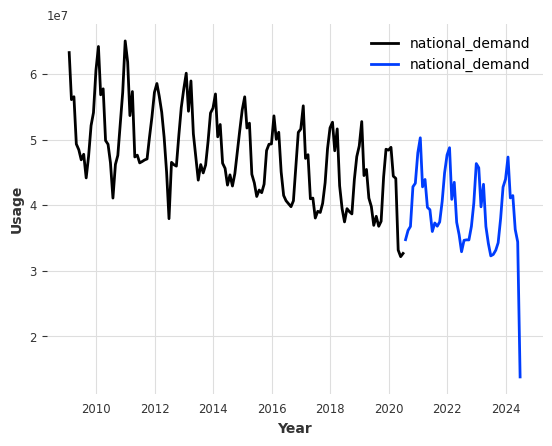

In [100]:
train, val = ts[:-48], ts[-48:]
train.plot()
val.plot()
plt.xlabel('Year')
plt.ylabel('Usage')

### Basic forecasting using Exponential Smoothing

In [101]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

/Users/neil/Documents/darts/darts-env/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plotting forecast against acutal demand


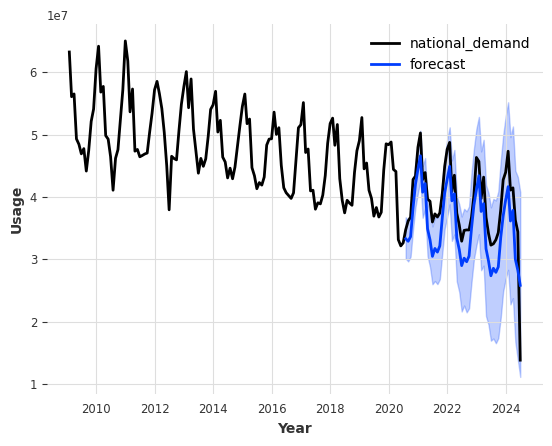

In [102]:
ts.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.xlabel('Year')
plt.ylabel('Usage')
plt.legend()

### Calcuating error metrics 

In [103]:
from darts.metrics import mape

print(
    f"Mean absolute percentage error for the Exponential Smoothing is: {mape(ts, prediction):.2f}%."
)

Mean absolute percentage error for the Exponential Smoothing is: 12.13%.


### Fun task, basic model evaluation with eval_model function, returning the MAPE metric of each model

In [104]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta

def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print(f"model {model} obtains MAPE: {mape(val, forecast):.2f}%")

eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 11.78%


/Users/neil/Documents/darts/darts-env/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
